In [7]:
import os
import random
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
# === Configuration ===
SOURCE_DIR = '/exchange/cvai/colorAIzer/data/coco/train2017'  # downloaded COCO images
TARGET_DIR = '/exchange/cvai/colorAIzer/data/coco1000'        # new target directory
NUM_IMAGES = 1000                   # number of images to pick
IMAGE_SIZE = (256, 256)             # resize to consistent size

# === Create folders ===
train_dir = os.path.join(TARGET_DIR, 'train')
valid_dir = os.path.join(TARGET_DIR, 'valid')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# === Pick random images ===
all_images = [f for f in os.listdir(SOURCE_DIR) if f.endswith('.jpg')]
selected_images = random.sample(all_images, NUM_IMAGES)

# === Process and save images ===
for img_name in tqdm(selected_images, desc="Processing images"):
    img_path = os.path.join(SOURCE_DIR, img_name)
    img = Image.open(img_path).convert('RGB')

    # resize
    img = img.resize(IMAGE_SIZE)

    # Save color image (train)
    img.save(os.path.join(train_dir, img_name))

    # Create and save grayscale version (valid)
    img_gray = img.convert('L')  # 'L' mode = grayscale
    img_gray = img_gray.convert('RGB')  # convert back to 3-channel grayscale (optional but safer)
    img_gray.save(os.path.join(valid_dir, img_name))

print(f"Done! {NUM_IMAGES} color images saved in '{train_dir}', grayscale images in '{valid_dir}'.")


Processing images: 100%|██████████| 1000/1000 [00:05<00:00, 168.51it/s]

Done! 1000 color images saved in '/exchange/cvai/colorAIzer/data/coco1000/train', grayscale images in '/exchange/cvai/colorAIzer/data/coco1000/valid'.


In [9]:
def show_random_image_from_folder(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    if not image_files:
        print("No images found in the folder.")
        return
    
    # Pick a random image
    img_name = random.choice(image_files)
    img_path = os.path.join(folder_path, img_name)

    # Open and display
    img = Image.open(img_path).convert('RGB')
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [12]:
def show_random_color_and_gray(train_folder, valid_folder):
    image_files = [f for f in os.listdir(train_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
    
    if not image_files:
        print("No images found in the train folder.")
        return

    # Pick a random image filename
    img_name = random.choice(image_files)
    color_img_path = os.path.join(train_folder, img_name)
    gray_img_path = os.path.join(valid_folder, img_name)

    # Check if the grayscale image exists
    if not os.path.exists(gray_img_path):
        print(f"Grayscale image not found for {img_name}.")
        return

    # Load both images
    color_img = Image.open(color_img_path).convert('RGB')
    gray_img = Image.open(gray_img_path).convert('RGB')

    # Plot
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    axs[0].imshow(color_img)
    axs[0].set_title(f"Color: {img_name}")
    axs[0].axis('off')

    axs[1].imshow(gray_img, cmap='gray')
    axs[1].set_title(f"Grayscale: {img_name}")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


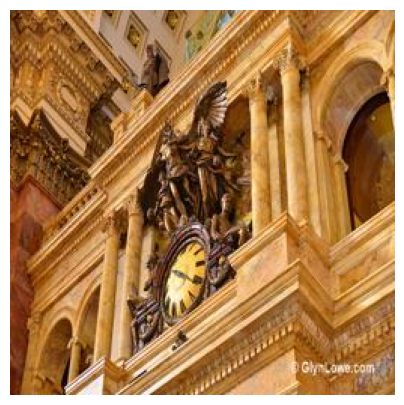

In [10]:
show_random_color_and_gray(/exchange/cvai/colorAIzer/data/coco1000)
